In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import kmeans
import kmeanspp
import kmeans_ll

### Function Comparison

In [2]:
def Kmeans_manu(data, k, max_iter = 1000):
    
    """This function implements the K-Means Algorith"""
    
    if type(data) == pd.DataFrame: data = data.values
    
    nrow = data.shape[0]
    index = np.random.choice(range(nrow), k, False)
    centers = data[index]
    cost = []
    iter = 1
    
    while (iter <= max_iter):
        distance = np.zeros([nrow, len(centers)])
        ## calculate distance & labels
        for i in range(nrow):
            for j in range(len(centers)):
                distance[i,j] = np.linalg.norm(data[i] - centers[j])**2        
        cost.append(sum(np.min(distance, axis=1)))
        labels = np.argmin(distance, axis=1)
        
        ## update centers
        centers_new = np.array([np.mean(data[labels == i], axis=0) for i in np.unique(labels)])
        
        ## sanity check
        if(np.all(centers == centers_new)): break 
        centers = centers_new
        iter += 1
    
    return labels, cost, iter, centers

In [3]:
spam = pd.read_csv("spambase.data", header = None).values

In [4]:
%timeit kmeans.Kmeans(5).fit(spam)
%timeit Kmeans_manu(spam, 5)

113 ms ± 8.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.6 s ± 526 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Simulation

In [5]:
cluster1 = np.c_[np.random.normal(1, 0.5, 1000), np.random.normal(2, 0.5, 1000)]
cluster2 = np.c_[np.random.normal(6, 0.5, 1000), np.random.normal(3, 0.5, 1000)]
cluster3 = np.c_[np.random.normal(3, 0.5, 1000), np.random.normal(5, 0.5, 1000)]
cluster4 = np.c_[np.random.normal(4, 0.5, 1000), np.random.normal(0, 0.5, 1000)]
cluster5 = np.c_[np.random.normal(3.5, 0.5, 500), np.random.normal(2, 0.5, 500)]
simulation = np.r_[cluster1, cluster2, cluster3, cluster4, cluster5]

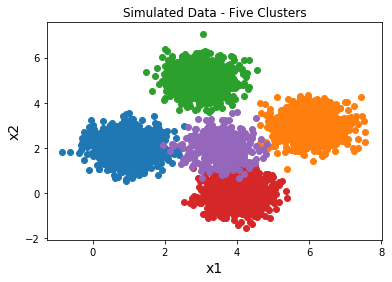

In [6]:
plt.scatter(cluster1[:,0], cluster1[:,1])
plt.scatter(cluster2[:,0], cluster2[:,1])
plt.scatter(cluster3[:,0], cluster3[:,1])
plt.scatter(cluster4[:,0], cluster4[:,1])
plt.scatter(cluster5[:,0], cluster5[:,1])
plt.xlabel("x1", fontsize = 14)
plt.ylabel("x2", fontsize = 14)
plt.title("Simulated Data - Five Clusters")
pass

#### K-Means

In [7]:
k1 = kmeans.Kmeans(5).fit(simulation)
labels1, cost1, iter1, centers1 = k1.labels, k1.cost, k1.iter, k1.centers

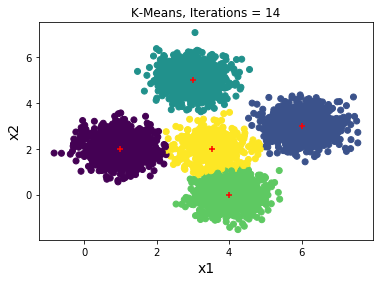

In [8]:
plt.scatter(simulation[:,0], simulation[:,1], c=labels1)
plt.scatter(centers1[0][0], centers1[0][1], c="red", marker="+")
plt.scatter(centers1[1][0], centers1[1][1], c="red", marker="+")
plt.scatter(centers1[2][0], centers1[2][1], c="red", marker="+")
plt.scatter(centers1[3][0], centers1[3][1], c="red", marker="+")
plt.scatter(centers1[4][0], centers1[4][1], c="red", marker="+")
plt.xlabel("x1", fontsize = 14)
plt.ylabel("x2", fontsize = 14)
plt.title("K-Means, Iterations = {}".format(iter1))
pass

#### K-Means ++

In [9]:
k2 = kmeanspp.Kmeanspp(5).fit(simulation)
labels2, cost2, iter2, centers2 = k2.labels, k2.cost, k2.iter, k2.centers

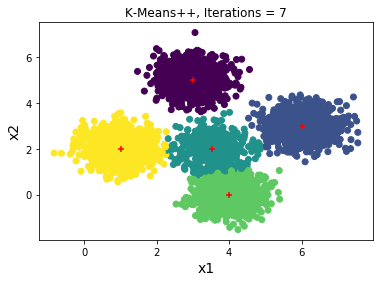

In [10]:
plt.scatter(simulation[:,0], simulation[:,1], c=labels2)
plt.scatter(centers2[0][0], centers2[0][1], c="red", marker="+")
plt.scatter(centers2[1][0], centers2[1][1], c="red", marker="+")
plt.scatter(centers2[2][0], centers2[2][1], c="red", marker="+")
plt.scatter(centers2[3][0], centers2[3][1], c="red", marker="+")
plt.scatter(centers2[4][0], centers2[4][1], c="red", marker="+")
plt.xlabel("x1", fontsize = 14)
plt.ylabel("x2", fontsize = 14)
plt.title("K-Means++, Iterations = {}".format(iter2))
pass

#### K-Means ll

In [11]:
k3 = kmeans_ll.Kmeansll(5, 0.5).fit(simulation)
labels3, cost3, iter3, centers3 = k3.labels, k3.cost, k3.iter, k3.centers

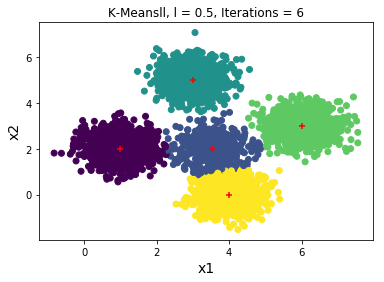

In [12]:
plt.scatter(simulation[:,0], simulation[:,1], c=labels3)
plt.scatter(centers3[0][0], centers3[0][1], c="red", marker="+")
plt.scatter(centers3[1][0], centers3[1][1], c="red", marker="+")
plt.scatter(centers3[2][0], centers3[2][1], c="red", marker="+")
plt.scatter(centers3[3][0], centers3[3][1], c="red", marker="+")
plt.scatter(centers3[4][0], centers3[4][1], c="red", marker="+")
plt.xlabel("x1", fontsize = 14)
plt.ylabel("x2", fontsize = 14)
plt.title("K-Meansll, l = 0.5, Iterations = {}".format(iter3))
pass

In [13]:
k4 = kmeans_ll.Kmeansll(5, 1).fit(simulation)
labels4, cost4, iter4, centers4 = k4.labels, k4.cost, k4.iter, k4.centers

In [14]:
k5 = kmeans_ll.Kmeansll(5, 2).fit(simulation)
labels5, cost5, iter5, centers5 = k5.labels, k5.cost, k5.iter, k5.centers

#### Cost v.s. Iteration Plot

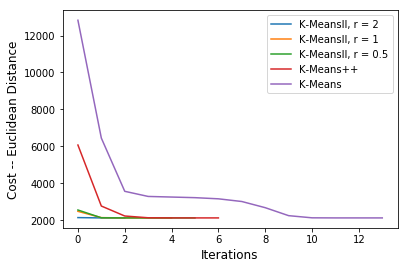

In [15]:
plt.plot(cost5)
plt.plot(cost4)
plt.plot(cost3)
plt.plot(cost2)
plt.plot(cost1)
plt.legend(("K-Meansll, r = 2","K-Meansll, r = 1","K-Meansll, r = 0.5", "K-Means++", "K-Means"))
plt.xlabel("Iterations", fontsize = 12)
plt.ylabel("Cost -- Euclidean Distance", fontsize = 12)
pass

In [16]:
%timeit kmeans.Kmeans(5).fit(simulation)
%timeit kmeanspp.Kmeanspp(5).fit(simulation)
%timeit kmeans_ll.Kmeansll(5, 0.5).fit(simulation)
%timeit kmeans_ll.Kmeansll(5, 1).fit(simulation)
%timeit kmeans_ll.Kmeansll(5, 2).fit(simulation)

19.5 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
20.8 ms ± 2.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
311 ms ± 46.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
512 ms ± 46.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
983 ms ± 94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Real-World Data
#### Spam Data
https://archive.ics.uci.edu/ml/datasets/Spambase

In [18]:
spam = pd.read_csv("spambase.data", header = None).values

#### K-Means

In [20]:
k1 = kmeans.Kmeans(5).fit(spam)
labels1, cost1, iter1, centers1 = k1.labels, k1.cost, k1.iter, k1.centers

#### K-Means++

In [21]:
k2 = kmeanspp.Kmeanspp(5).fit(spam)
labels2, cost2, iter2, centers2 = k2.labels, k2.cost, k2.iter, k2.centers

#### K-Meansll

In [22]:
k3 = kmeans_ll.Kmeansll(5, 0.5).fit(spam)
labels3, cost3, iter3, centers3 = k3.labels, k3.cost, k3.iter, k3.centers

In [23]:
k4 = kmeans_ll.Kmeansll(5, 1).fit(spam)
labels4, cost4, iter4, centers4 = k4.labels, k4.cost, k4.iter, k4.centers

In [24]:
k5 = kmeans_ll.Kmeansll(5, 2).fit(spam)
labels5, cost5, iter5, centers5 = k5.labels, k5.cost, k5.iter, k5.centers

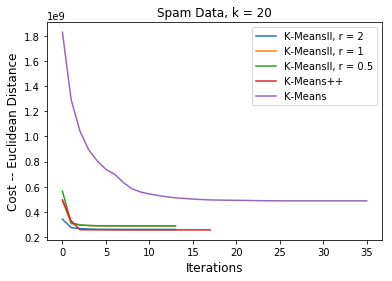

In [25]:
plt.plot(cost5)
plt.plot(cost4)
plt.plot(cost3)
plt.plot(cost2)
plt.plot(cost1)
plt.legend(("K-Meansll, r = 2","K-Meansll, r = 1","K-Meansll, r = 0.5", "K-Means++", "K-Means"))
plt.xlabel("Iterations", fontsize = 12)
plt.ylabel("Cost -- Euclidean Distance", fontsize = 12)
plt.title("Spam Data, k = 20")
pass

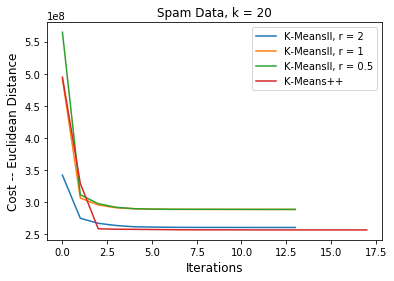

In [26]:
plt.plot(cost5)
plt.plot(cost4)
plt.plot(cost3)
plt.plot(cost2)
plt.legend(("K-Meansll, r = 2","K-Meansll, r = 1","K-Meansll, r = 0.5", "K-Means++"))
plt.xlabel("Iterations", fontsize = 12)
plt.ylabel("Cost -- Euclidean Distance", fontsize = 12)
plt.title("Spam Data, k = 20")
pass

In [27]:
%timeit kmeans.Kmeans(20).fit(spam)
%timeit kmeanspp.Kmeanspp(20).fit(spam)
%timeit kmeans_ll.Kmeansll(20, 0.5).fit(spam)
%timeit kmeans_ll.Kmeansll(20, 1).fit(spam)
%timeit kmeans_ll.Kmeansll(20, 2).fit(spam)

676 ms ± 58.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
182 ms ± 21.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.17 s ± 204 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.24 s ± 323 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.65 s ± 719 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%timeit kmeans.Kmeans(50).fit(spam)
%timeit kmeanspp.Kmeanspp(50).fit(spam)
%timeit kmeans_ll.Kmeansll(50, 0.5).fit(spam)
%timeit kmeans_ll.Kmeansll(50, 1).fit(spam)
%timeit kmeans_ll.Kmeansll(50, 2).fit(spam)

The slowest run took 6.29 times longer than the fastest. This could mean that an intermediate result is being cached.
1.19 s ± 626 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
441 ms ± 114 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.23 s ± 242 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.9 s ± 1.37 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
20.2 s ± 1.48 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
%timeit kmeans.Kmeans(50).fit(spam)
%timeit kmeanspp.Kmeanspp(50).fit(spam)
%timeit kmeans_ll.Kmeansll(50, 0.5).fit(spam)
%timeit kmeans_ll.Kmeansll(50, 1).fit(spam)
%timeit kmeans_ll.Kmeansll(50, 2).fit(spam)

995 ms ± 360 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
503 ms ± 118 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.97 s ± 377 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.33 s ± 674 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
20.4 s ± 980 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
